In [40]:
# Load necessary libraries
library(ggplot2)

# Define housing data URLs and paths
DOWNLOAD_ROOT <- "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH <- file.path("data", "housing")
HOUSING_URL <- paste0(DOWNLOAD_ROOT, "datasets/housing/housing.tgz")

# Ensure the directory exists
if (!dir.exists(HOUSING_PATH)) {
  dir.create(HOUSING_PATH, recursive = TRUE)
}

# Function to fetch housing data
fetch_housing_data <- function(housing_url = HOUSING_URL, housing_path = HOUSING_PATH) {
  tgz_path <- file.path(housing_path, "housing.tgz")
  if (!file.exists(tgz_path)) {
    download.file(housing_url, tgz_path)
  }
  untar(tgz_path, exdir = housing_path)
}

# Fetch housing data
fetch_housing_data()

# Load housing data into a data frame
load_housing_data <- function(housing_path = HOUSING_PATH) {
  csv_path <- file.path(housing_path, "housing.csv")
  return(read.csv(csv_path))
}

housing <- load_housing_data()

head(housing)





,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
2,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
3,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
4,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
5,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY
6,-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY


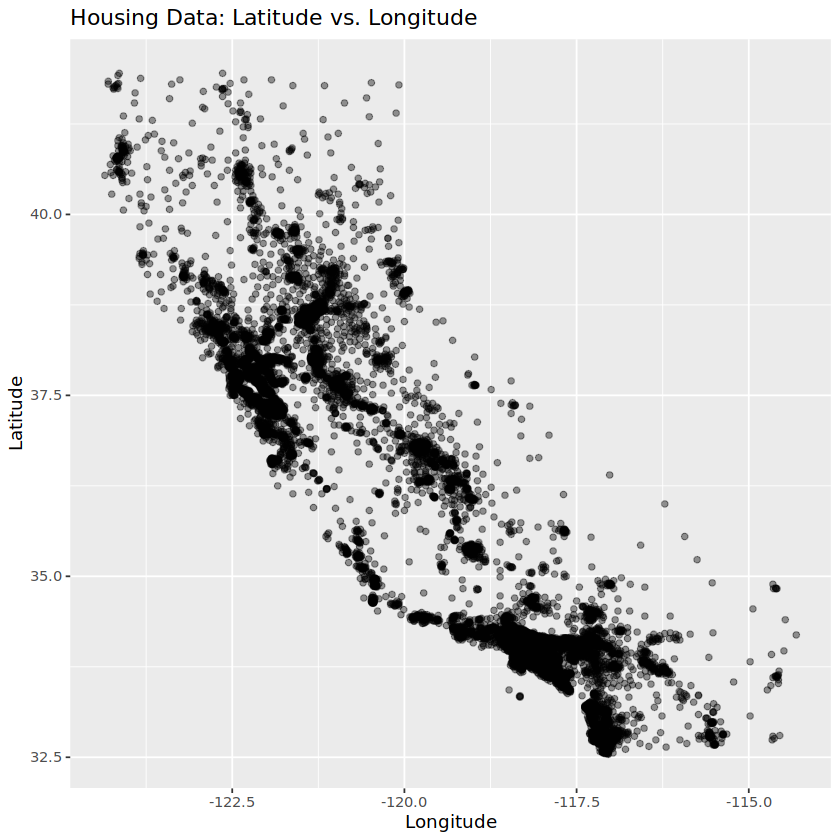

In [36]:
ggplot(data = housing, aes(x = longitude, y = latitude)) +
  geom_point(alpha = 0.4) +
  labs(x = "Longitude", y = "Latitude") +
  ggtitle("Housing Data: Latitude vs. Longitude")

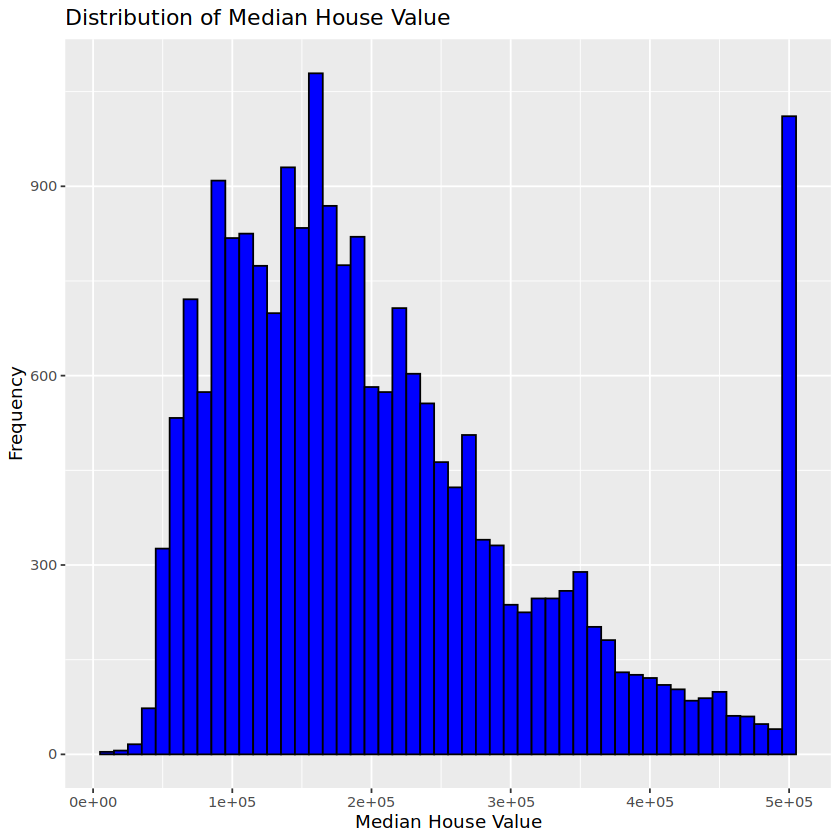

In [37]:
# Create a histogram of housing prices
ggplot(data = housing, aes(x = median_house_value)) +
  geom_histogram(binwidth = 10000, fill = "blue", color = "black") +
  labs(x = "Median House Value", y = "Frequency") +
  ggtitle("Distribution of Median House Value")


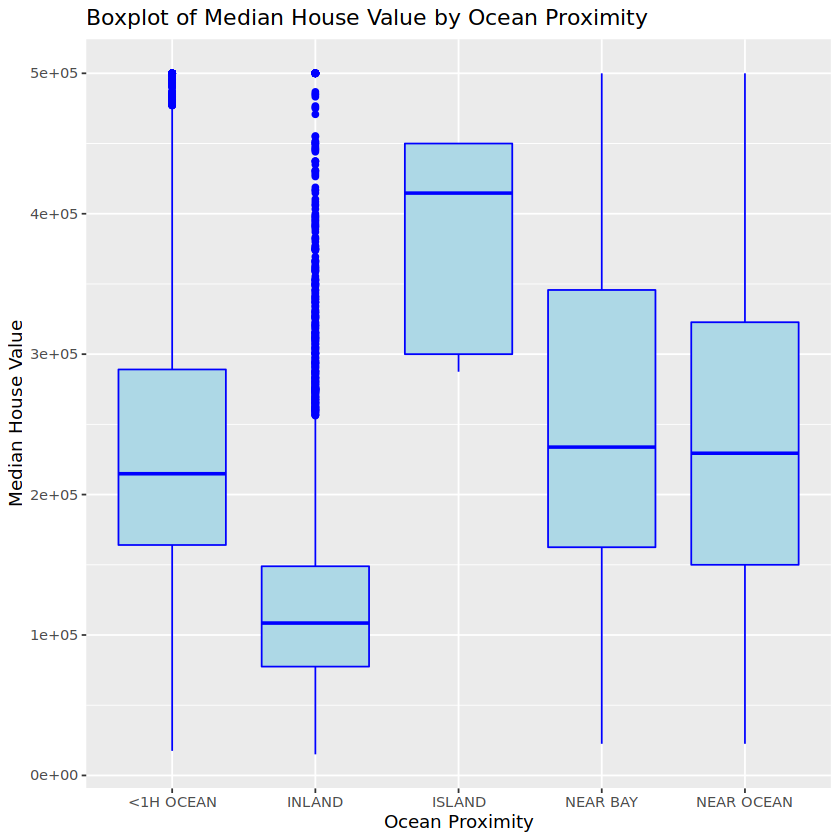

In [38]:
# Create a boxplot of housing prices by different categories (e.g., ocean_proximity)
ggplot(data = housing, aes(x = ocean_proximity, y = median_house_value)) +
  geom_boxplot(fill = "lightblue", color = "blue") +
  labs(x = "Ocean Proximity", y = "Median House Value") +
  ggtitle("Boxplot of Median House Value by Ocean Proximity")

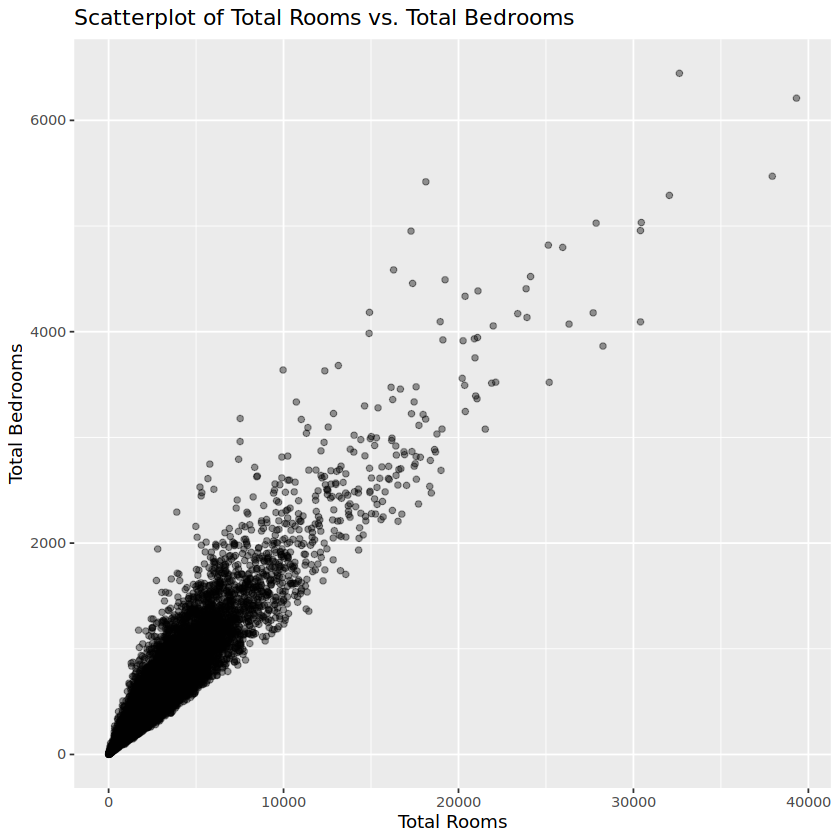

In [32]:
housing_clean <- na.omit(housing[c("total_rooms", "total_bedrooms")])

# Create the scatterplot
ggplot(data = housing_clean, aes(x = total_rooms, y = total_bedrooms)) +
  geom_point(alpha = 0.4) +
  labs(x = "Total Rooms", y = "Total Bedrooms") +
  ggtitle("Scatterplot of Total Rooms vs. Total Bedrooms")



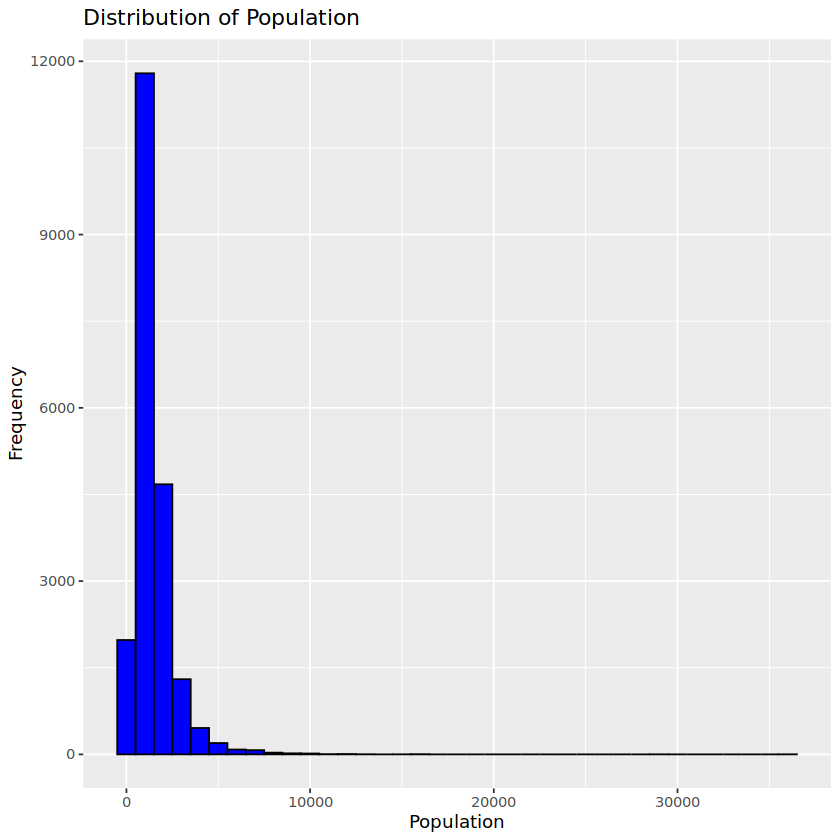

In [14]:
ggplot(data = housing, aes(x = population)) +
  geom_histogram(binwidth = 1000, fill = "blue", color = "black") +
  labs(x = "Population", y = "Frequency") +
  ggtitle("Distribution of Population")


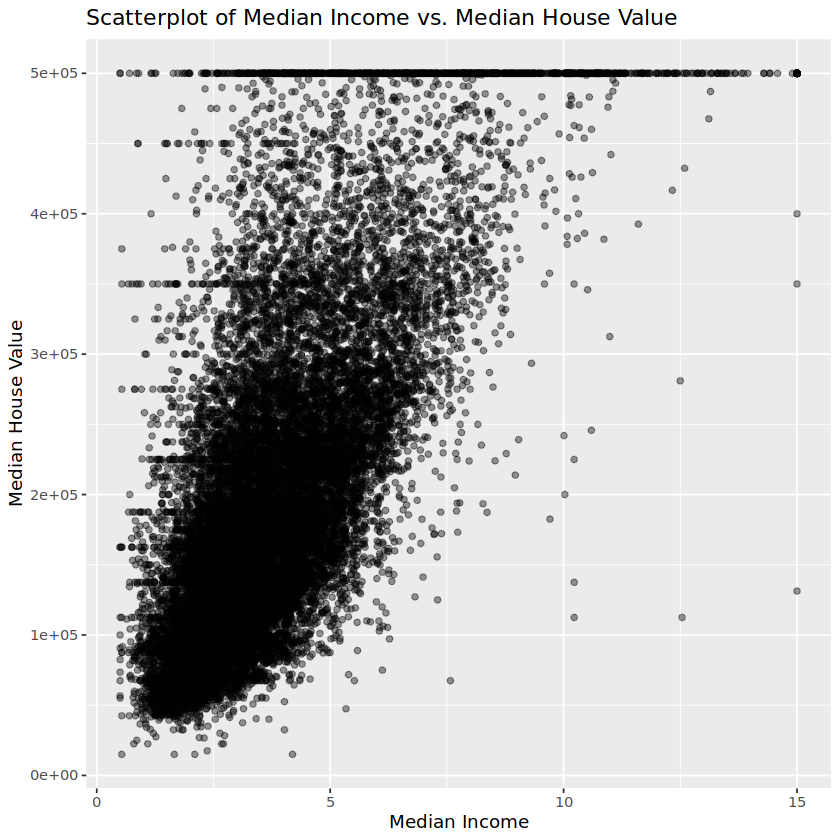

In [15]:
ggplot(data = housing, aes(x = median_income, y = median_house_value)) +
  geom_point(alpha = 0.4) +
  labs(x = "Median Income", y = "Median House Value") +
  ggtitle("Scatterplot of Median Income vs. Median House Value")


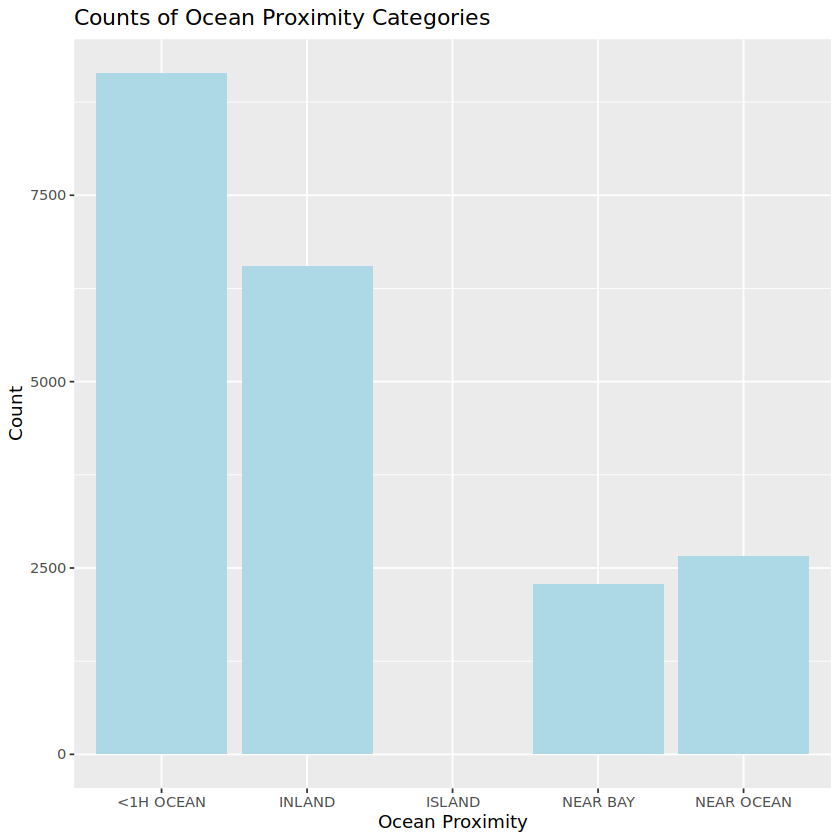

In [16]:
ggplot(data = housing, aes(x = ocean_proximity)) +
  geom_bar(fill = "lightblue") +
  labs(x = "Ocean Proximity", y = "Count") +
  ggtitle("Counts of Ocean Proximity Categories")


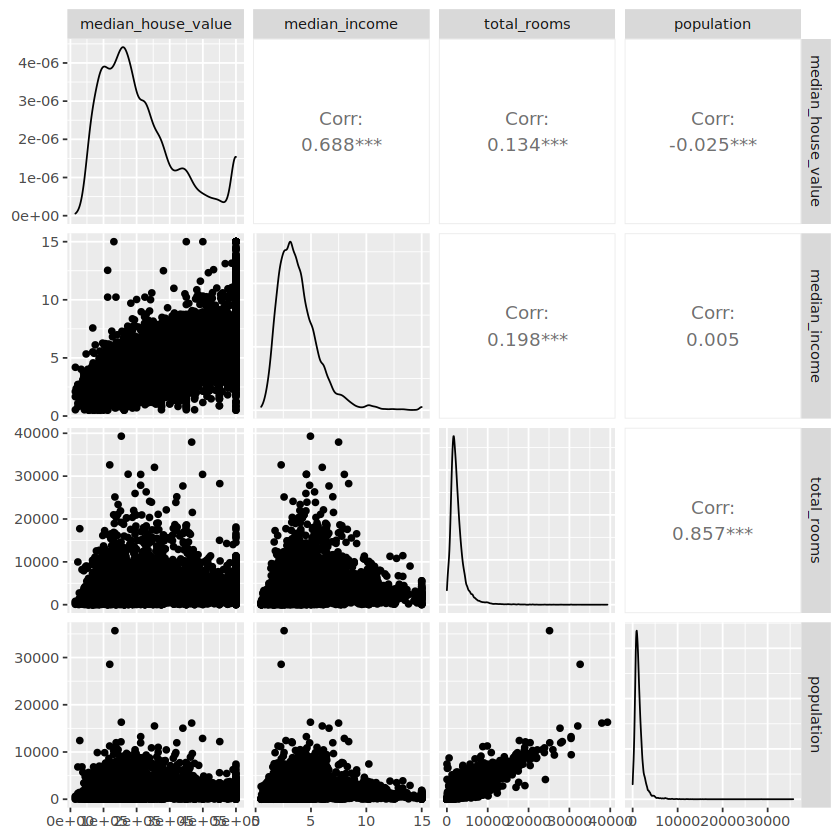

In [29]:
# Load the GGally package
library(GGally)


ggpairs(housing[, c("median_house_value", "median_income", "total_rooms", "population")])


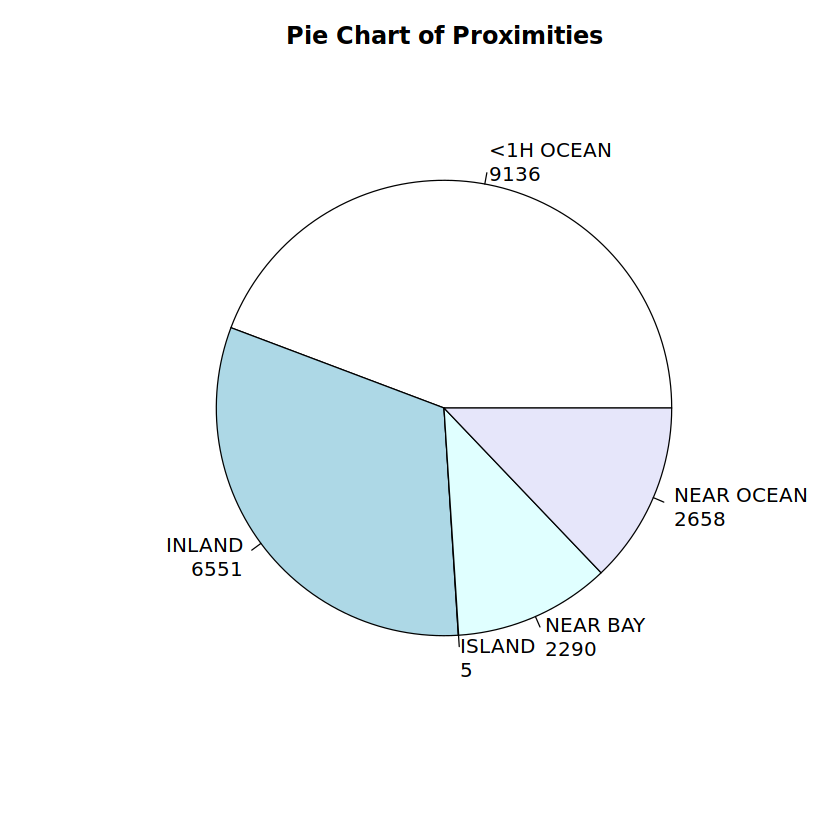

In [33]:
mytable <- table(housing$ocean_proximity)
lbls <- paste(names(mytable), "\n", mytable, sep="")
pie(mytable, labels = lbls,
   main="Pie Chart of Proximities\n ")

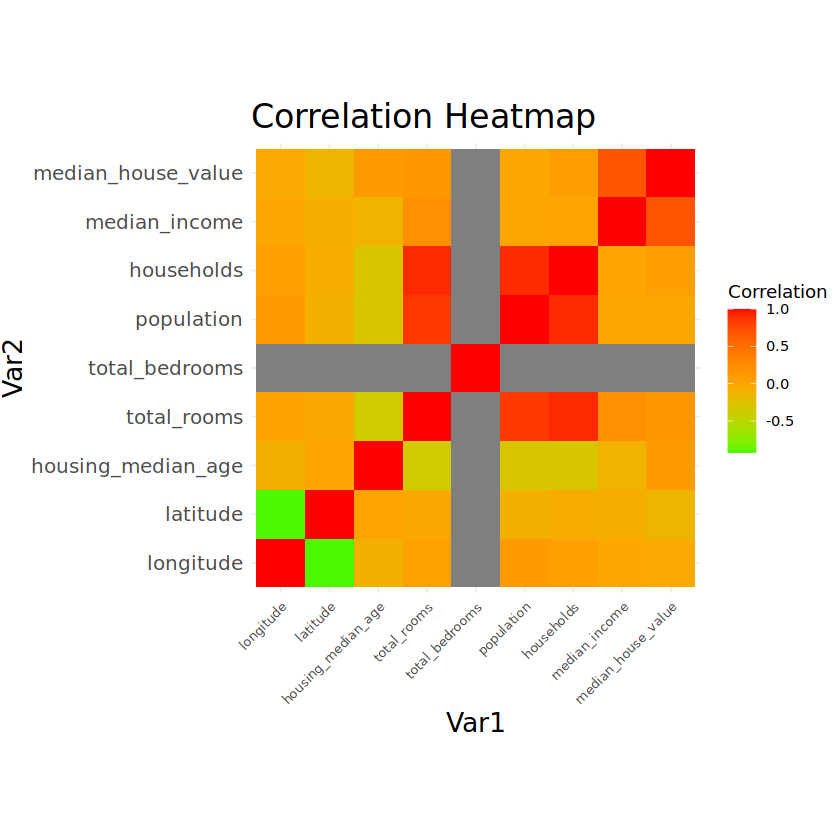

In [39]:
numeric_columns <- sapply(housing, is.numeric)
correlation_matrix <- cor(housing[, numeric_columns])

# Melt the correlation matrix
correlation_data <- reshape2::melt(correlation_matrix)

# Create a correlation heatmap with larger dimensions

ggplot(data = correlation_data, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "green", mid = "orange", high = "red") +
  theme_minimal() +
  labs(title = "Correlation Heatmap") +
  theme(
    plot.title = element_text(size = 20),  # Adjust title size
    axis.text.x = element_text(size = 8, angle = 45, hjust = 1),  # Adjust x-axis text size and rotation
    axis.text.y = element_text(size = 12),  # Adjust y-axis text size
    axis.title = element_text(size = 16),  # Adjust axis title size
    plot.margin = margin(1, 1, 1, 1)  # Adjust margin to control size
  ) +
  coord_fixed(ratio = 1) +  # Keep the aspect ratio fixed
  guides(fill = guide_colorbar(title = "Correlation"))  # Adjust colorbar title size


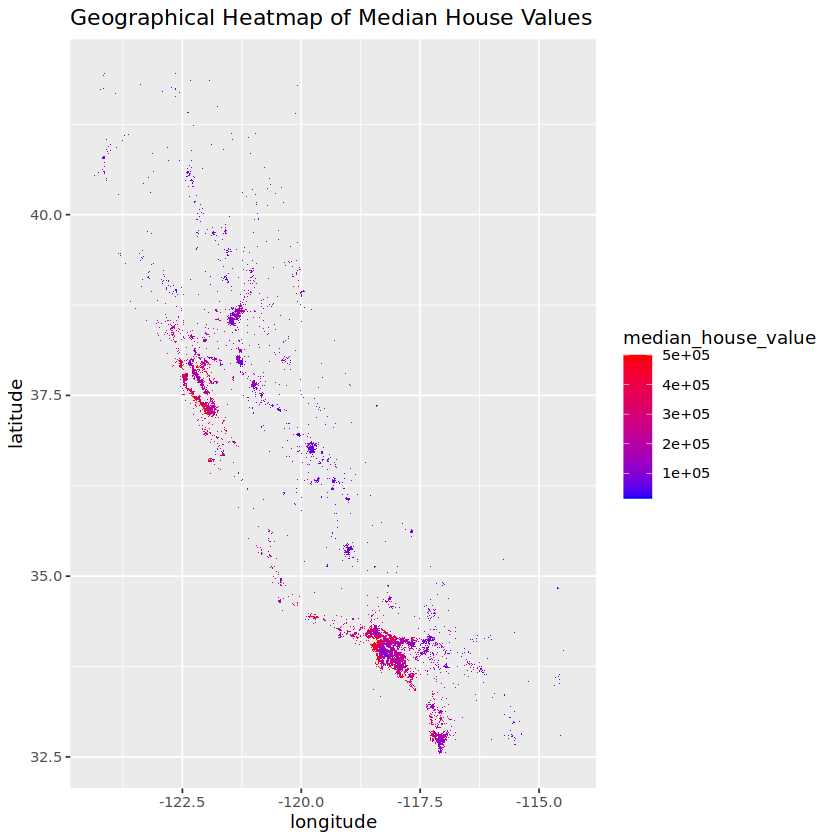

In [19]:
ggplot(data = housing, aes(x = longitude, y = latitude, fill = median_house_value)) +
  geom_tile() +
  scale_fill_gradient(low = "blue", high = "red") +
  labs(title = "Geographical Heatmap of Median House Values")
